# Homework 3

Young, James Yang


20740589

### Question 1

(a)

$A= \begin{bmatrix}4 & -2\\-2 & 6 \end{bmatrix}$
$B= \begin{bmatrix}6 & 12\end{bmatrix}$

(b)

In [1]:
# import packages
import scipy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd

In [2]:
a = np.array([[4,-2],[-2,6]])
b = np.array([6,12])
x_init = np.array([0,0])

In [3]:
# functions
def original_f(x1,x2):
    return 2*x1**2 + 3*x2**2 - 2*x1*x2 - 6*x1 - 12*x2
def f(x):
    return 0.5*(np.dot(np.dot(x.T,a),x)) - np.dot(b.T, x)

# define gradient, a is symmetric 
def grad(x):
    return np.dot(a,x) - b


1. Constant step size $t^k = 0.1$

In [4]:
# simple gradient descent, 
# # parameters: f is f(x), grad is gradient(x), x0 is initial point, t is step size
def grad_descent(grad,x0,t,max_iter = 1000,tolerance = 1e-5):
    # initialize x, f(x), and f'(x), iterations, stored results array
    results = np.array([])
    xk = x0
    gradientx = grad(xk)
    num_iter = 0
    results = np.append(results, xk)
    # make steps
    while np.linalg.norm(gradientx)>tolerance and num_iter < max_iter:
        # update x(k+1) = xk + tk * grad(xk), search direction downward so subtract
        xk = xk - t * gradientx
        # update gradient at new point
        gradientx = grad(xk)
        # store result
        results = np.append(results,xk)
        num_iter += 1
    return results.reshape(-1,2)

In [5]:
estimate_b1 = grad_descent(grad,x_init,0.1)

print("Solution for constant step size tk= 0.1 is \n x = ", estimate_b1[-1])
print("Iterations: ", estimate_b1.shape[0])

Solution for constant step size tk= 0.1 is 
 x =  [2.99999769 2.99999857]
Iterations:  45


2. Exact line search

In [6]:
# parameters: f is f(x), grad is gradient(x), x0 is initial point
def exact_line_search_descent(f,grad,x0,max_iter=1000,tolerance=1e-5):
    # initialize x, f(x), and f'(x), iterations, stored results array
    xk = x0
    gradientx = grad(xk)
    num_iter = 0
    results = np.array([])
    results = np.append(results,xk)
    while np.linalg.norm(gradientx)>tolerance and num_iter<max_iter:
        # solve for t = arg min f (x + t∆x) with scipy
        line_search = scipy.optimize.line_search(f,grad,xk,-gradientx)
        t = line_search[0]
        # update x
        xk = xk - t * gradientx
        # update gradient at new point
        gradientx = grad(xk)
        # store result
        results = np.append(results,xk)
        num_iter += 1
    return results.reshape(-1,2)


In [7]:
estimate_b2 = exact_line_search_descent(f,grad,x_init)

print("Solution for exact line search  is \n x = ", estimate_b2[-1])
print("Iterations: ", estimate_b2.shape[0])

Solution for exact line search  is 
 x =  [2.99999821 2.99999821]
Iterations:  17


3. Backtracking line search ($\alpha = 0.2$, $\beta = 0.8$)

In [8]:
# starting at t = 1, repeat t ← βt until f (x + t∆x) < f (x) + αt∇f (x)T∆x
def backtracking_line_search(xk, gradientx, t, beta=0.8, alpha=0.2):
    f_left = f(xk - t*gradientx)
    while f_left > f(xk) - alpha*t*(np.dot(gradientx, gradientx)):
        t = t * beta
        f_left = f(xk - t*gradientx)
    return t

In [9]:
# parameters: f is f(x), grad is gradient(x), x0 is initial point, t is step size
def backtracking_gradient_descent(f, grad, x0, t=1, max_iter=1000,tolerance=1e-5):
    # initialize x, f(x), and f'(x), iterations, stored results array
    xk = x0    
    fx = f(xk)
    gradientx = grad(xk)
    num_iter = 0
    results = np.array([])
    results = np.append(results,xk)
    # make steps
    while np.linalg.norm(gradientx) > tolerance and num_iter < max_iter:
        # update t with backtrace line search
        t = backtracking_line_search(xk, gradientx, t)
        #update x, gradx
        xk = xk - t * gradientx
        gradientx = grad(xk)
        num_iter += 1
        results = np.append(results,xk)
    
    return results.reshape(-1,2)

In [10]:
estimate_b3 = backtracking_gradient_descent(f,grad,x_init)
print("Solution for backtracking line search  is \n x = ", estimate_b3[-1])
print("Iterations: ", estimate_b3.shape[0])

Solution for backtracking line search  is 
 x =  [3.00000069 2.99999888]
Iterations:  23


(c)

In [11]:
# since a is symmetric, hessian is 2* a
def hessian(x):
    return 2*a

# parameters: f is f(x), grad is gradient(x), x0 is initial point, t is step size
def newton_method(f,grad,x0,t,max_iter=1000,tolerance=1e-5):
    # initialize
    xk = x0    
    fx = f(xk)
    num_iter = 0
    results = np.array([])
    results = np.append(results,xk)
    gradientx = np.dot(-np.linalg.inv(hessian(xk)), grad(xk))
    lambda_x = np.dot(-grad(xk),gradientx)
    # make steps, condition is lambda/2 > episilon
    while lambda_x/2.0 > tolerance and num_iter<max_iter:
        # Compute Newton step and decrement:
        gradientx = np.dot(-np.linalg.inv(hessian(xk)), grad(xk))
        lambda_x = np.dot(-grad(xk),gradientx)
        # update x, constant step
        xk = xk + t*gradientx
        results = np.append(results,xk)
        num_iter += 1
    return results.reshape(-1,2)

In [12]:
estimate_c = newton_method(f,grad,x_init,1)

print("Solution for Newton Method  is \n x = ", estimate_c[-1])
print("Iterations: ", estimate_c.shape[0])

Solution for Newton Method  is 
 x =  [2.99926758 2.99926758]
Iterations:  13


(d)

In [13]:
def conjugate_gradient(f,grad,x0,max_iter=1000,tolerance=1e-5):
    num_iter = 0
    results = np.array([])
    # initialization
    xk = x0
    results = np.append(results,xk)
    pk = b - a @ xk
    rk = b - a @ xk

    # repeat
    while num_iter<max_iter:
        # step 1 initialize step tk
        tk = (rk @ rk) / (pk@a@pk)
        # step 2 update xk
        xk = xk + tk * pk
        # append result
        results = np.append(results,xk)
        num_iter+=1
        # step 3 update rk+1
        rk_1 = rk - tk * a @ pk
        # step 4 condition check
        if np.linalg.norm(rk_1,ord=1) < tolerance:
            break
        # step 5 gammak
        gamma_k = (rk_1 @ rk_1) / (rk@rk)
        # step 6 update pk
        pk = rk_1 + gamma_k * pk
        # update rk
        rk = rk_1
        
    return results.reshape(-1,2)

In [14]:
estimate_d = conjugate_gradient(f,grad,x_init)

print("Solution for Conjugate Gradient Algorithm is \n x = ", estimate_d[-1])
print("Iterations: ", estimate_d.shape[0])

Solution for Conjugate Gradient Algorithm is 
 x =  [3. 3.]
Iterations:  3


(e)

The optimal solution $x^*$ is {3,3}.

In [15]:
# Quick sanity check

# check with scipy minimize
test_result = scipy.optimize.minimize(f,x_init)
print("With Scipy Minimize: ",test_result.x)

# with cvxpy
x_star = cp.Variable(2)
obj = cp.Minimize(0.5*cp.QuadForm(x_star,a)-b.T@x_star)
prob = cp.Problem(obj)
prob.solve()
print("With CVXPY: ",x_star.value)

With Scipy Minimize:  [2.99999998 3.00000003]
With CVXPY:  [3. 3.]


Convergence Plots

In [16]:
# combine data
x1b1, x2b1 = estimate_b1[:,0], estimate_b1[:,1]
x1b2, x2b2 = estimate_b2[:,0], estimate_b2[:,1]
x1b3, x2b3 = estimate_b3[:,0], estimate_b3[:,1]
x1c, x2c = estimate_c[:,0], estimate_c[:,1]
x1d, x2d = estimate_d[:,0], estimate_d[:,1]
data = {0:x1b1,1:x2b1,2:x1b2,3:x2b2,4:x1b3,5:x2b3,
6:x1c,7:x2c,8:x1d,9:x2d}

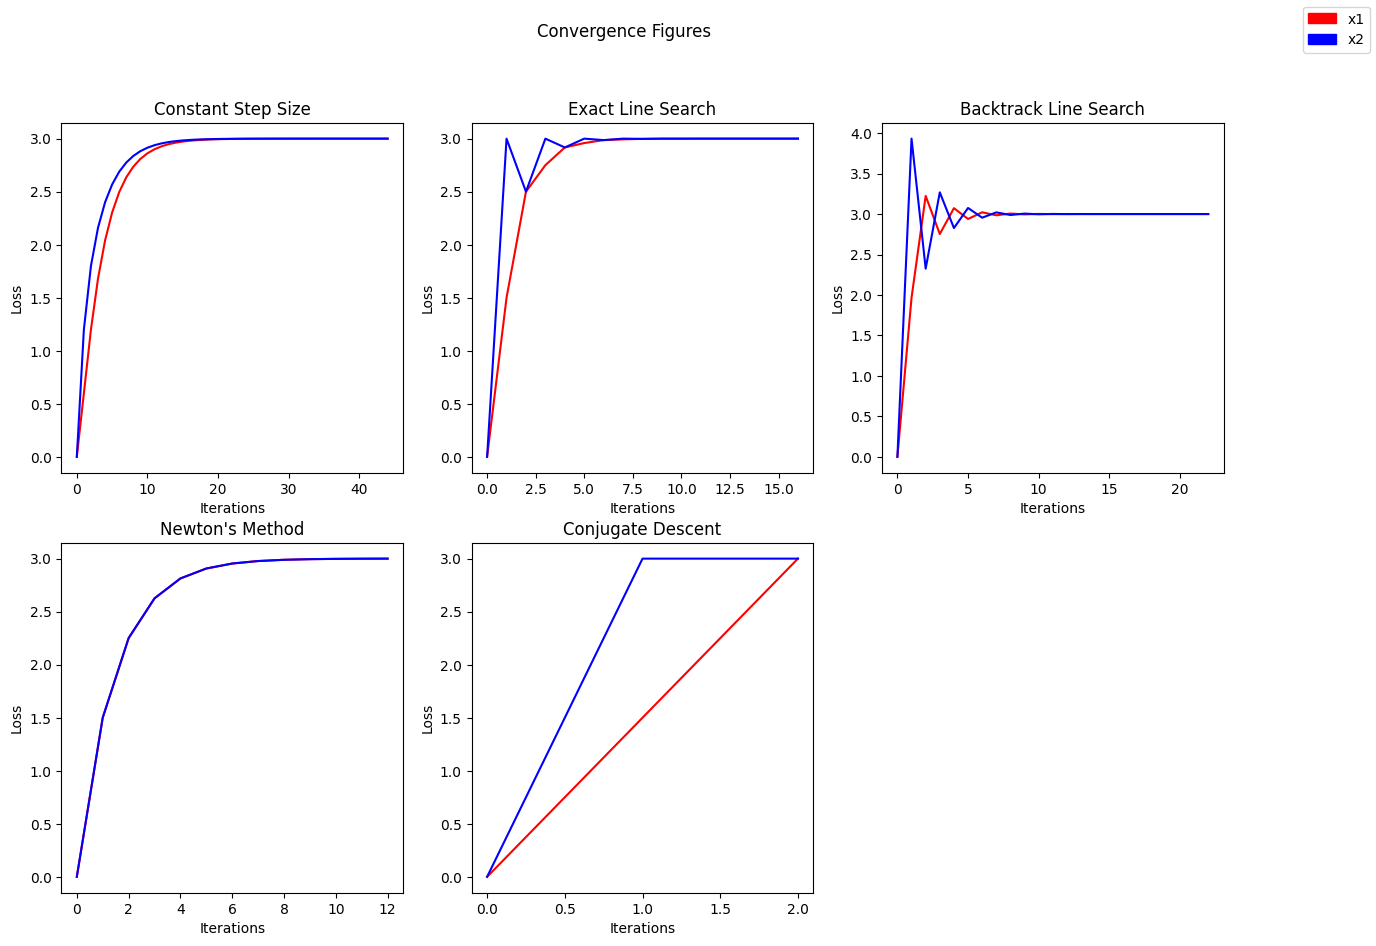

In [17]:
import matplotlib.patches as mpatches
titles = ['Constant Step Size', 'Exact Line Search', 'Backtrack Line Search', 'Newton\'s Method', 'Conjugate Descent','']
fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,10)
n = 0
c = 0
for i in range(2):
    for j in range(3):
        ax[i,j].set_title(titles[n])
        ax[i,j].set_xlabel('Iterations')
        ax[i,j].set_ylabel('Loss')
        if(i>=1 and j>1):
            break
        ax[i,j].plot(data[c],color='red')
        c+=1
        ax[i,j].plot(data[c],color='blue')
        c+=1
        n+=1

x1_legend = mpatches.Patch(color='red',label='x1')
x2_legend = mpatches.Patch(color='blue',label='x2')
fig.suptitle("Convergence Figures")
fig.delaxes(ax[1,2])
fig.legend(handles=[x1_legend,x2_legend])


The Conjugate Gradient method has the fastest rate of convergence in this problem. The steepest gradient descent methods as seen in part(b) are slower as they use local information to make local descision meaning there is no guarantee it will take the global optimal path, potentially leading to zigzagging. Newton's method in part (c) is faster than the steepest descent method as it incorporates the Hessian into the calculation. 

Normally, it should be expected that the Newton's method should be faster since it takes the Hessian which the conjugate gradient method doesn't. However in this case the result I obtained indicated that the conjugate descent method was faster potentially due to the starting point picked. 

(f)

Text(0.5, 1.0, 'Gradient Descent Constant Step (tk=0.1)')

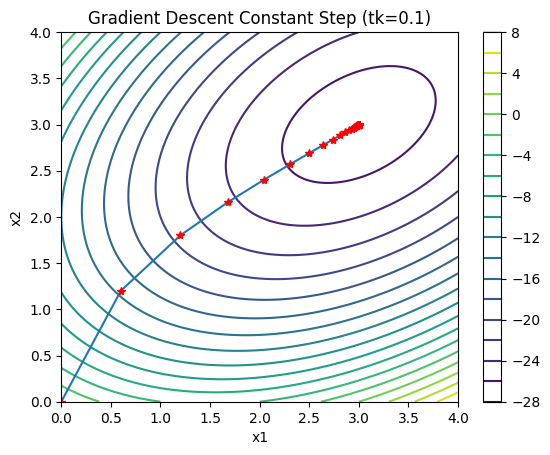

In [18]:
# Plot for (b) constant step size 0.1
x1 = np.linspace(0,4,150)
x2 = np.linspace(0,4,150)
x1,x2 = np.meshgrid(x1,x2)
z = original_f(x1,x2)

fig = plt.figure()
plt.contour(x1,x2,z,20)
plt.plot(x1b1,x2b1)
plt.plot(x1b1,x2b1,'*',color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.title("Gradient Descent Constant Step (tk=0.1)")

Text(0.5, 1.0, 'Gradient Descent Backtracking Line Search')

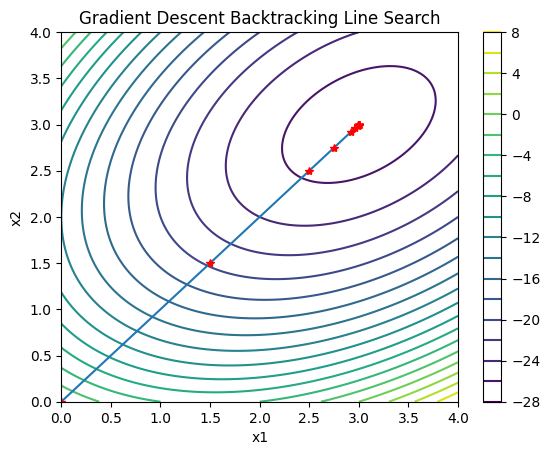

In [19]:
# Plot for (b) exact line search
x1 = np.linspace(0,4,150)
x2 = np.linspace(0,4,150)
x1,x2 = np.meshgrid(x1,x2)
z = original_f(x1,x2)

fig = plt.figure()
plt.contour(x1,x2,z,20)
plt.plot(x1b2,x1b2)
plt.plot(x1b2,x1b2,'*',color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.title("Gradient Descent Backtracking Line Search")

Text(0.5, 1.0, 'Gradient Descent Backtracking Line Search')

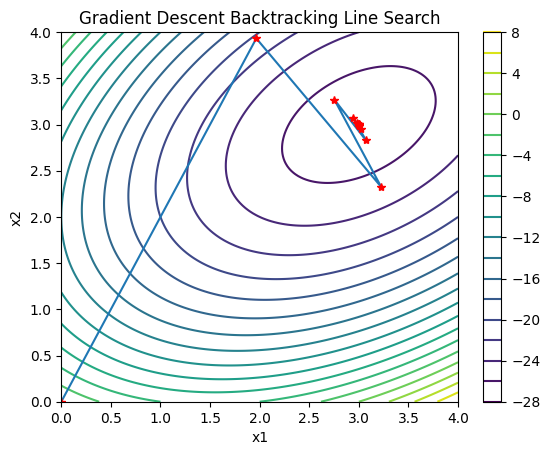

In [20]:
# Plot for (b) backtracking line search
x1 = np.linspace(0,4,150)
x2 = np.linspace(0,4,150)
x1,x2 = np.meshgrid(x1,x2)
z = original_f(x1,x2)

fig = plt.figure()
plt.contour(x1,x2,z,20)
plt.plot(x1b3,x2b3)
plt.plot(x1b3,x2b3,'*',color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.title("Gradient Descent Backtracking Line Search")

Text(0.5, 1.0, "Newton's Method")

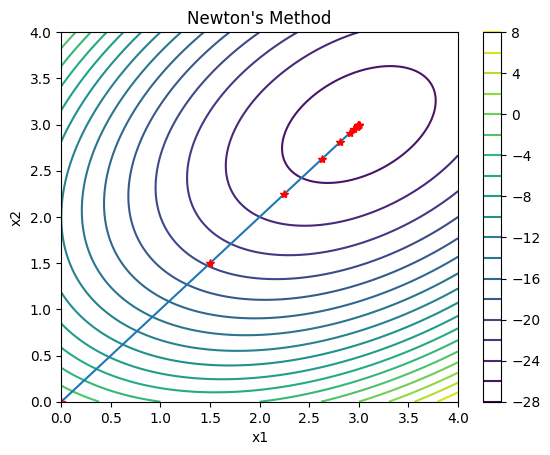

In [21]:
# Plot for (c) Newton's method
x1 = np.linspace(0,4,150)
x2 = np.linspace(0,4,150)
x1,x2 = np.meshgrid(x1,x2)
z = original_f(x1,x2)

fig = plt.figure()
plt.contour(x1,x2,z,20)
plt.plot(x1c,x2c)
plt.plot(x1c,x2c,'*',color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.title("Newton's Method")

Text(0.5, 1.0, 'Conjugate Gradient Algorithm')

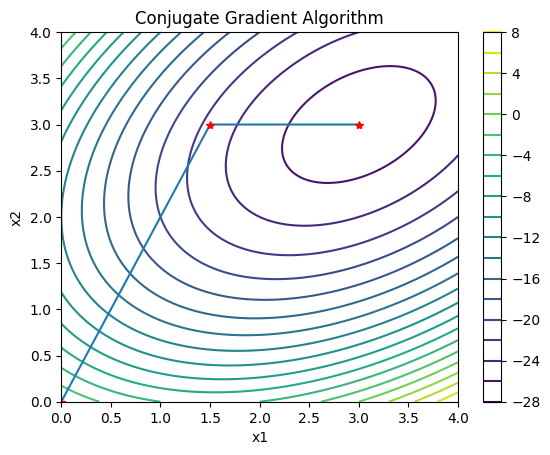

In [22]:
# Plot for (d) Conjugate Method
x1 = np.linspace(0,4,150)
x2 = np.linspace(0,4,150)
x1,x2 = np.meshgrid(x1,x2)
z = original_f(x1,x2)

fig = plt.figure()
plt.contour(x1,x2,z,20)
plt.plot(x1d,x2d)
plt.plot(x1d,x2d,'*',color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.title("Conjugate Gradient Algorithm")

### Question 2

In [107]:
# set up problem
sigma = np.array([[1.0,0.02,-0.04],[0.02,1.0,0.02],[-0.04,0.02,1.0]])
b2=np.array([1/3,1/3,1/3])
n = 3

# Gradient is ∇f(x) = Σx − b/x = 0
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y

# function
def g(x):
    return 0.5*(np.dot(np.dot(x.T,sigma),x)) - np.dot(b2.T, np.log(x))


(a)

In [108]:
# Gradients for x1
def grad1(x1,x2,x3):
    return x1+0.02*x2 - 0.04*x3 - safe_div(1,3*x1)

# Gradient for x2
def grad2(x2,x1,x3):
    return x2+0.02*x1 + 0.02*x3 - safe_div(1,3*x2)

# Gradient for x3
def grad3(x3,x1,x2):
    return -0.04*x1 + 0.02*x2 + x3 - safe_div(1,3*x3)

In [171]:
# xi = arg min f(xk(1),...,xk(n+1)), optimize in parallel
def jacobi(x0,iterations):
    # initialize
    xk = x0
    results = np.array([])
    results = np.append(results,xk)
    num_iter=1
    # for k iterations, get arg min xi
    while num_iter<iterations:
        # for each xi, get arg min by setting gradient of xi to 0 and using fsolve then update in parallel
        xk[0] = scipy.optimize.fsolve(grad1,xk[0],args=(xk[0],xk[2]))
        xk[1] = scipy.optimize.fsolve(grad2,xk[1],args=(xk[1],xk[2]))
        xk[2] = scipy.optimize.fsolve(grad3,xk[2],args=(xk[2],xk[1]))
        # update
        results = np.append(results,xk)
        num_iter+=1
    return results.reshape(-1,3)

In [172]:
jacobi_result = jacobi(np.array([0.001,0.001,0.001]),5)
print("Result from Jacobi Algorithm is: ",jacobi_result[-1])
print("Iterations (k) chosen: ", jacobi_result.shape[0])

Result from Jacobi Algorithm is:  [0.58321533 0.56597108 0.58338951]
Iterations (k) chosen:  5


(d)

In [173]:
# Using CVXPY to get x*

x_var = cp.Variable(n)

obj = cp.Minimize(0.5*cp.QuadForm(x_var,sigma)-b2.T@cp.log(x_var))
problem = cp.Problem(obj)
time = problem.solve()
print("Time taken to solve with CVXPY: ", time, " sec")
print("Solution x* = ",x_var.value)

Time taken to solve with CVXPY:  1.0491026873265894  sec
Solution x* =  [0.58339175 0.56580067 0.58339175]


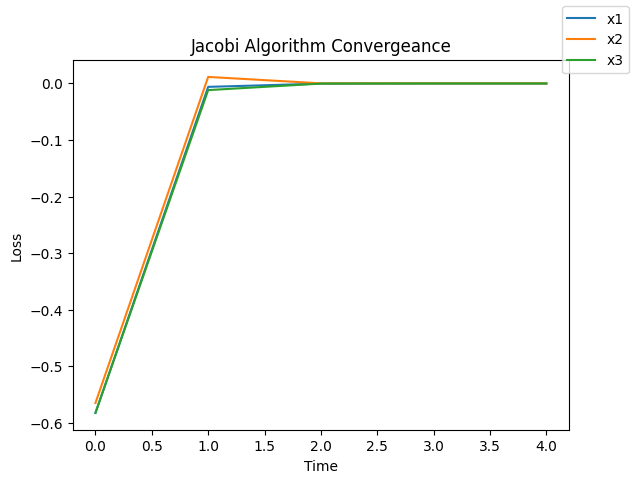

In [174]:
# Plot convergeance of Jacobi
fig, ax = plt.subplots()
ax.plot(jacobi_result[:,0] - x_var.value[0], label = "x1")
ax.plot(jacobi_result[:,1] - x_var.value[1], label = "x2")
ax.plot(jacobi_result[:,2]-x_var.value[2], label = "x3")
ax.set_xlabel("Time")
ax.set_ylabel("Loss")
ax.set_title("Jacobi Algorithm Convergeance")
fig.legend()